In [1]:
import numpy as np
from numpy import random as rand
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
def computeCost(X, y, theta):
    m = X.shape[0]
    J = (1 / 2 * m) * sum(sum(((X.dot(theta) - y)**2)))
    return J

In [3]:
def normalizeFeature(X): 
    samples, features = X.shape
    
    mu_vec = np.mean(X, axis=0)
    sigma_vec = np.std(X, axis=0)
    
    mu = np.reshape(mu_vec, (1, features))
    sigma = np.reshape(sigma_vec, (1, features))
    
    mu_temp = np.ones((samples, 1)).dot(mu)
    sigma_temp = np.ones((samples, 1)).dot(sigma)
    
    return (X - mu_temp) / sigma_temp, mu, sigma

In [4]:
def gradientDescent(X, y, theta, alpha, num_iters):
    samples, features = X.shape
    
    J_history = np.zeros(num_iters)

    for i in range(num_iters):
        t_sum = sum((X.dot(theta) - y) * X)

        theta = theta - (alpha / samples) * np.reshape(t_sum, theta.shape)
        
        J_history[i] = computeCost(X, y, theta)
        
    return J_history, theta

In [5]:
alpha = 0.01
num_iters = 300

In [6]:
from sklearn.datasets import load_boston
boston = load_boston()
data = boston.data

In [7]:
bos = pd.DataFrame(boston.data)
bos.columns = boston.feature_names
bos['PRICE'] = boston.target
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [8]:
X = boston.data[:,5:6]
y = boston.target
y = np.reshape(y, (y.shape[0],1))

samples, features = X.shape

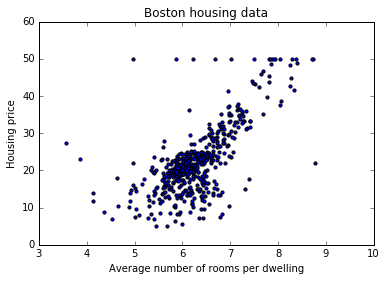

In [9]:
plt.scatter(X, y, s=10)
plt.xlabel("Average number of rooms per dwelling")
plt.ylabel("Housing price")
plt.title("Boston housing data")
plt.show()

In [10]:
theta = np.zeros((features + 1, 1))

In [11]:
X_norm, mu, sigma = normalizeFeature(X)
X_norm = np.hstack((np.ones((samples, 1)), X_norm))

In [12]:
J_history, theta = gradientDescent(X_norm, y, theta, alpha, num_iters)

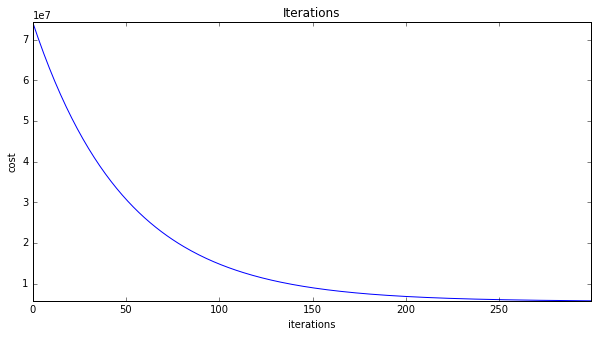

In [13]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(np.arange(J_history.size), J_history)
ax.axis('tight')
ax.set_title('Iterations')
ax.set_xlabel('iterations')
ax.set_ylabel('cost');

In [14]:
new_data = np.array([[5],[10],[8.75],[7.69],[6.23],[5.13]])
new_x_norm = (new_data - mu) / sigma
new_x = np.hstack((np.ones((new_x_norm.shape[0], 1)), new_x_norm))

In [15]:
predicted_prices = new_x.dot(theta)

In [29]:
pred = pd.DataFrame(new_data)
pred.columns = ["AVG_ROOMS"]
pred["PREDICTED PRICE"] = predicted_prices
pred.head()

,AVG_ROOMS,PREDICTED PRICE
0,5.00,10.308325
1,10.00,53.586992
2,8.75,42.767325
3,7.69,33.592247
4,6.23,20.954877


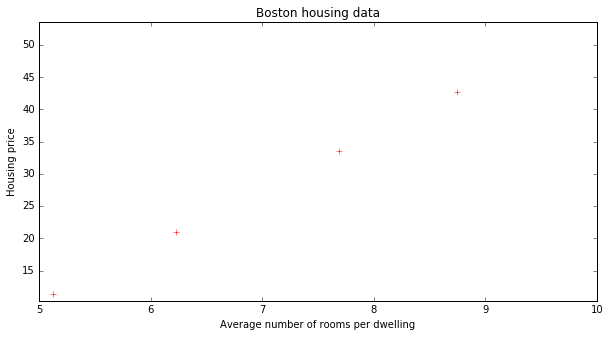

In [30]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(new_data, predicted_prices[:,0],"r+")
ax.axis('tight')
ax.set_title('Boston housing data')
ax.set_xlabel('Average number of rooms per dwelling')
ax.set_ylabel('Housing price');
#plt.scatter(new_x, predicted_prices, s=10)